In [1]:
import numpy as np
import catboost as cb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('/home/andrews-tang/Datasets/ILS_dataset.xlsx')
df.head()

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ANGLE', 'DDM_T1', 'DDM_T2', 'SDM_T1', 'SDM_T2', 'DDM_T1_std',
       'DDM_T2_std', 'SDM_T1_std', 'SDM_T2_std', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [4]:
columns_to_remove = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 
                     'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
                     'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 
                     'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 
                     'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
                     'Unnamed: 24']

columns_to_remove

['Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24']

In [5]:
df.drop(columns=columns_to_remove, axis=1, inplace=True)

In [6]:
df.head(10)

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69
5,10.0,39.97,41.64,44.26,39.46,39.81,39.38,43.85,41.45
6,5.0,28.84,28.45,40.01,39.91,28.31,27.90,39.58,39.50
7,4.0,21.43,21.30,40.05,39.99,20.92,21.03,39.73,39.66
8,3.0,14.72,14.82,40.09,40.03,13.94,14.22,39.84,39.80
9,2.0,9.02,9.12,40.10,40.05,8.40,8.38,39.93,39.90


In [7]:
df['DDM_T1_diff'] = df['DDM_T1'] - df['DDM_T1_std']
df['DDM_T2_diff'] = df['DDM_T2'] - df['DDM_T2_std']
df['SDM_T1_diff'] = df['SDM_T1'] - df['SDM_T1_std']
df['SDM_T2_diff'] = df['SDM_T2'] - df['SDM_T2_std']

In [43]:
df.head(30)

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,DDM_T1_diff,DDM_T2_diff,SDM_T1_diff,SDM_T2_diff
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,-1.91,-1.32,0.01,0.00
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,-0.06,-0.35,0.04,-0.01
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,-0.16,0.29,0.10,-0.03
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,0.20,0.25,0.04,0.02
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,0.07,-0.17,-0.02,0.02
5,10.0,39.97,41.64,44.26,39.46,39.81,39.38,43.85,41.45,0.16,2.26,0.41,-1.99
6,5.0,28.84,28.45,40.01,39.91,28.31,27.90,39.58,39.50,0.53,0.55,0.43,0.41
7,4.0,21.43,21.30,40.05,39.99,20.92,21.03,39.73,39.66,0.51,0.27,0.32,0.33
8,3.0,14.72,14.82,40.09,40.03,13.94,14.22,39.84,39.80,0.78,0.60,0.25,0.23
9,2.0,9.02,9.12,40.10,40.05,8.40,8.38,39.93,39.90,0.62,0.74,0.17,0.15


In [9]:
df_ddm_t1 = df[['ANGLE','DDM_T1','DDM_T1_std','DDM_T1_diff']]
df_ddm_t2 = df[['ANGLE','DDM_T2','DDM_T2_std','DDM_T2_diff']]

df_sdm_t1 = df[['ANGLE','SDM_T1','SDM_T1_std','SDM_T1_diff']]
df_sdm_t2 = df[['ANGLE','SDM_T2','SDM_T2_std','SDM_T2_diff']]

In [33]:
df_ddm_t1.head(20)

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_diff
0,22,33.22,35.13,-1.91
1,21,26.87,26.93,-0.06
2,20,22.69,22.85,-0.16
3,19,28.45,28.25,0.20
4,18,38.10,38.03,0.07
5,17,39.97,39.81,0.16
6,16,28.84,28.31,0.53
7,15,21.43,20.92,0.51
8,14,14.72,13.94,0.78
9,13,9.02,8.40,0.62


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANGLE        276 non-null    float64
 1   DDM_T1       276 non-null    float64
 2   DDM_T2       276 non-null    float64
 3   SDM_T1       276 non-null    float64
 4   SDM_T2       276 non-null    float64
 5   DDM_T1_std   276 non-null    float64
 6   DDM_T2_std   276 non-null    float64
 7   SDM_T1_std   276 non-null    float64
 8   SDM_T2_std   276 non-null    float64
 9   DDM_T1_diff  276 non-null    float64
 10  DDM_T2_diff  276 non-null    float64
 11  SDM_T1_diff  276 non-null    float64
 12  SDM_T2_diff  276 non-null    float64
dtypes: float64(13)
memory usage: 28.2 KB


In [11]:
corr_matrix = df_ddm_t1[['ANGLE', 'DDM_T1', 'DDM_T1_std','DDM_T1_diff']].corr()
corr_matrix

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_diff
ANGLE,1.000000,0.811128,0.819999,-0.371266
DDM_T1,0.811128,1.000000,0.997690,-0.269959
DDM_T1_std,0.819999,0.997690,1.000000,-0.334750
DDM_T1_diff,-0.371266,-0.269959,-0.334750,1.000000


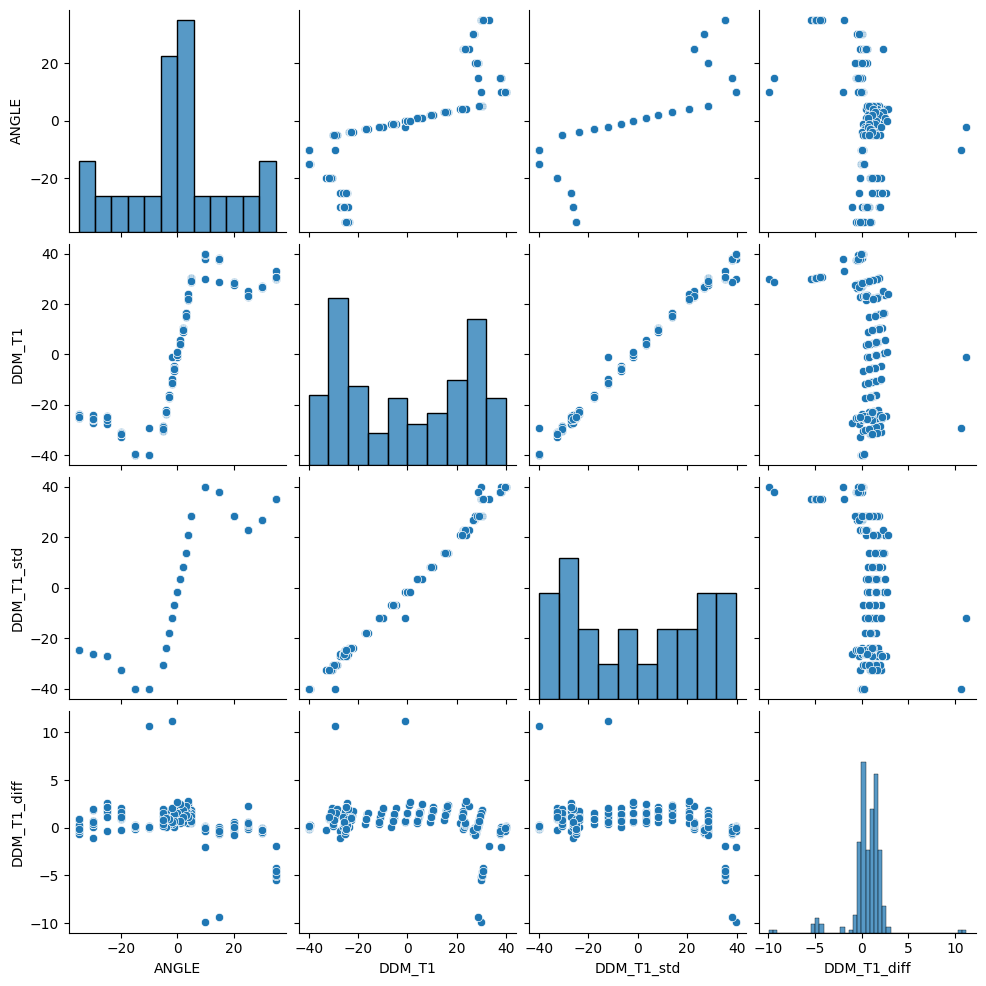

In [12]:
sns.pairplot(df_ddm_t1)

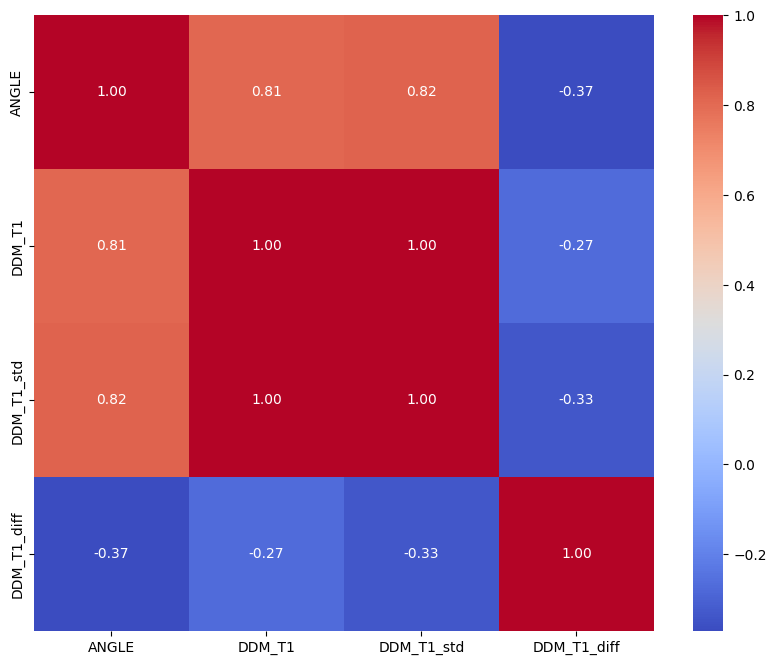

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_ddm_t1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

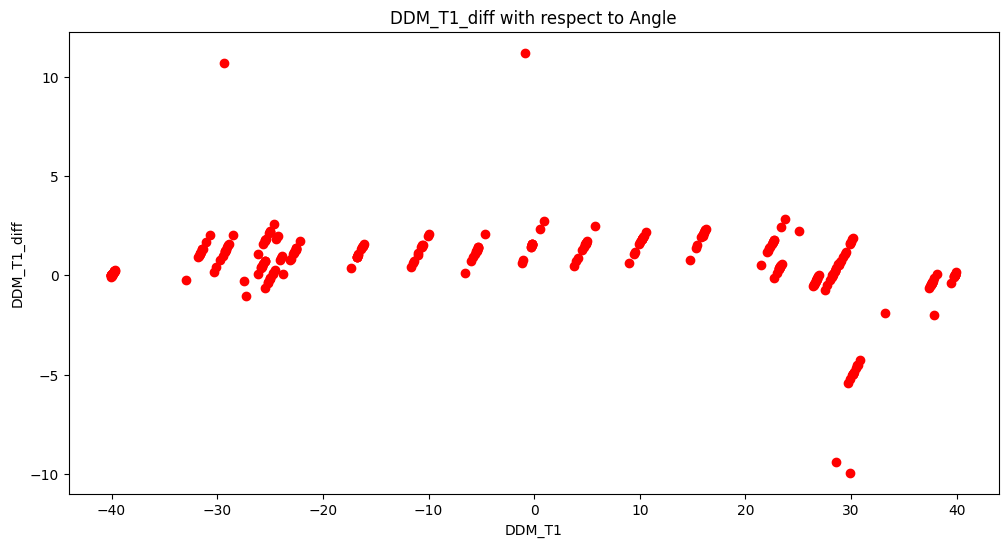

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['DDM_T1'], df['DDM_T1_diff'], color='r')
plt.xlabel('DDM_T1')
plt.ylabel('DDM_T1_diff')
plt.title('DDM_T1_diff with respect to Angle')
plt.show()

In [36]:
df_ddm_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANGLE        276 non-null    int8   
 1   DDM_T1       276 non-null    float64
 2   DDM_T1_std   276 non-null    float64
 3   DDM_T1_diff  276 non-null    float64
dtypes: float64(3), int8(1)
memory usage: 6.9 KB


In [15]:
df_ddm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes

X = df_ddm_t1.drop('DDM_T1_diff', axis=1)
y = df_ddm_t1['DDM_T1_diff']

/tmp/ipykernel_75430/2538751399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ddm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 258 to 102
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ANGLE       220 non-null    int8   
 1   DDM_T1      220 non-null    float64
 2   DDM_T1_std  220 non-null    float64
dtypes: float64(2), int8(1)
memory usage: 5.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 30 to 10
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ANGLE_x           56 non-null     int8   
 1   DDM_T1            56 non-null     float64
 2   DDM_T1_std        56 non-null     float64
 3   DDM_T1_predicted  56 non-null     float64
 4   ANGLE_y           56 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 2.2 KB


(None, None)

In [18]:
model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=4,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42
)

In [19]:
categorical_features_indices = [df_ddm_t1.columns.get_loc('ANGLE')]

In [20]:
model.fit(X_train, y_train, cat_features=[X_train.columns.get_loc('ANGLE')], eval_set=(X_test, y_test), verbose=100)

0:	learn: 1.9150425	test: 1.0363784	best: 1.0363784 (0)	total: 47.9ms	remaining: 47.9s
100:	learn: 0.7839475	test: 0.5665279	best: 0.5665279 (100)	total: 285ms	remaining: 2.54s
200:	learn: 0.4783948	test: 0.5161422	best: 0.5148810 (196)	total: 459ms	remaining: 1.82s
300:	learn: 0.3674878	test: 0.4731713	best: 0.4731713 (300)	total: 576ms	remaining: 1.34s
400:	learn: 0.3017602	test: 0.4407853	best: 0.4407853 (400)	total: 698ms	remaining: 1.04s
500:	learn: 0.2560240	test: 0.4192697	best: 0.4192697 (500)	total: 799ms	remaining: 796ms
600:	learn: 0.2256449	test: 0.3978225	best: 0.3974359 (591)	total: 906ms	remaining: 601ms
700:	learn: 0.1946332	test: 0.3840322	best: 0.3840322 (700)	total: 1.01s	remaining: 433ms
800:	learn: 0.1731559	test: 0.3740785	best: 0.3740231 (796)	total: 1.1s	remaining: 274ms
900:	learn: 0.1591274	test: 0.3716670	best: 0.3708817 (886)	total: 1.24s	remaining: 136ms
999:	learn: 0.1426486	test: 0.3675013	best: 0.3674708 (981)	total: 1.35s	remaining: 0us

bestTest = 0.36

In [21]:
predictions = model.predict(X_test)

In [22]:
predictions

array([ 1.56574071e+00,  1.42478823e+00,  1.45388056e+00,  1.45388056e+00,
        1.42478823e+00, -4.04345905e-01,  1.53460618e+00,  1.32543406e+00,
       -2.30326468e-01, -2.07269925e-01,  1.19095454e+00, -5.80510063e-03,
        1.98804131e+00,  8.45412191e-01,  1.25152579e+00, -4.65301780e-01,
        1.17471465e+00,  1.25152579e+00,  1.11670119e+00,  1.42478823e+00,
       -2.11803180e-03, -4.92342004e-01,  1.12876917e+00,  1.27363756e-01,
        1.75805040e+00,  5.94385223e-02,  2.48984472e-01,  1.12876917e+00,
        1.14710416e+00,  2.21246788e-01, -2.05176334e-01, -5.80510063e-03,
       -1.82997002e-01, -1.48758937e-01,  1.25152579e+00,  5.54595259e-01,
       -2.30326468e-01, -2.38871983e-01,  5.54595259e-01,  7.66316432e-01,
       -4.22916161e+00,  1.55732734e+00,  2.27933624e+00,  2.48984472e-01,
       -3.48882671e-01,  7.66316432e-01,  1.09016775e+00, -5.38952302e-02,
        1.50908280e+00,  2.21109803e+00, -5.38952302e-02,  6.93678038e-01,
        8.32504742e-01,  

In [23]:
results = pd.DataFrame([predictions, y_test]).transpose().rename(columns={0: 'Predictions', 1: 'y_test'})
results.head(10)

,Predictions,y_test
0,1.565741,1.75
1,1.424788,1.82
2,1.453881,2.06
3,1.453881,1.40
4,1.424788,1.80
5,-0.404346,-0.16
6,1.534606,1.82
7,1.325434,1.31
8,-0.230326,-0.27
9,-0.207270,0.01


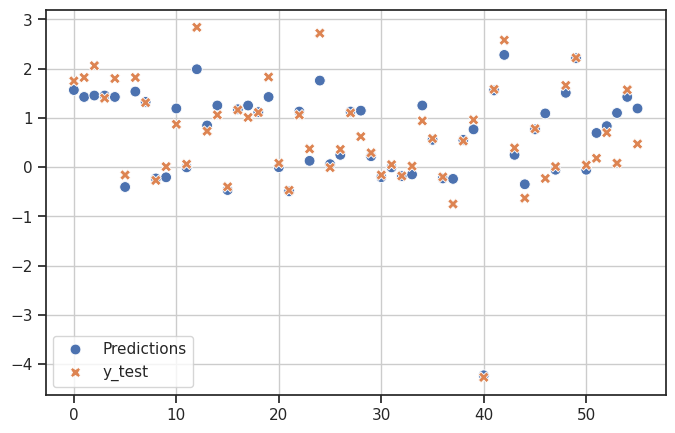

In [26]:
plt.figure(figsize=(8,5))
sns.set(style = 'ticks')

sns.scatterplot(results, s=60)
# y_ticks = np.arange(87.2, 92.3, 0.1)
# plt.ylim(87.2, 92.2)
# plt.yticks(y_ticks)
plt.grid(True)

In [27]:
best_score = model.get_best_score()
best_score

{'learn': {'RMSE': 0.14264864690404933},
 'validation': {'RMSE': 0.3674708281452521}}

In [28]:
X_test.head(10)

,ANGLE,DDM_T1,DDM_T1_std
30,15,22.67,20.92
124,13,10.22,8.40
196,10,-4.61,-6.67
127,10,-5.27,-6.67
216,13,10.20,8.40
234,18,37.87,38.03
144,16,30.13,28.31
203,3,-31.41,-32.72
254,21,26.66,26.93
143,17,39.82,39.81


In [29]:
X_test['DDM_T1_predicted'] = X_test['DDM_T1'] + predictions

/tmp/ipykernel_75430/1894472338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['DDM_T1_predicted'] = X_test['DDM_T1'] + predictions


In [30]:
X_test.head(10)

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_predicted
30,15,22.67,20.92,24.235741
124,13,10.22,8.40,11.644788
196,10,-4.61,-6.67,-3.156119
127,10,-5.27,-6.67,-3.816119
216,13,10.20,8.40,11.624788
234,18,37.87,38.03,37.465654
144,16,30.13,28.31,31.664606
203,3,-31.41,-32.72,-30.084566
254,21,26.66,26.93,26.429674
143,17,39.82,39.81,39.612730


In [31]:
X_test = X_test.merge(df[['ANGLE']], left_on='ANGLE', right_index=True, how='left')

In [40]:
X_test

,ANGLE_x,DDM_T1,DDM_T1_std,DDM_T1_predicted,ANGLE_y
30,15,22.67,20.92,24.235741,-4.0
124,13,10.22,8.40,11.644788,-2.0
196,10,-4.61,-6.67,-3.156119,1.0
127,10,-5.27,-6.67,-3.816119,1.0
216,13,10.20,8.40,11.624788,-2.0
234,18,37.87,38.03,37.465654,-15.0
144,16,30.13,28.31,31.664606,-5.0
203,3,-31.41,-32.72,-30.084566,20.0
254,21,26.66,26.93,26.429674,-30.0
143,17,39.82,39.81,39.612730,-10.0


In [44]:
angle_order = [35, 30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -10, -15, -20, -25, -30, -35]

X_test['ANGLE_y_ordered'] = pd.Categorical(X_test['ANGLE_y'], categories=angle_order, ordered=True)

In [46]:
X_test_sorted = X_test.sort_values(by='ANGLE_y_ordered')

In [48]:
X_test_sorted

,ANGLE_x,DDM_T1,DDM_T1_std,DDM_T1_predicted,ANGLE_y,ANGLE_y_ordered
68,0,-23.86,-24.82,-23.093684,35.0,35
45,0,-24.74,-24.82,-24.742118,35.0,35
114,0,-25.45,-24.82,-25.798883,35.0,35
22,0,-24.98,-24.82,-25.185176,35.0,35
206,0,-24.04,-24.82,-23.273684,35.0,35
159,1,-25.51,-26.21,-24.677495,30.0,30
158,2,-25.63,-27.20,-24.204178,25.0,25
66,2,-24.62,-27.20,-22.340664,25.0,25
204,2,-24.98,-27.20,-22.768902,25.0,25
180,3,-31.66,-32.72,-30.531231,20.0,20


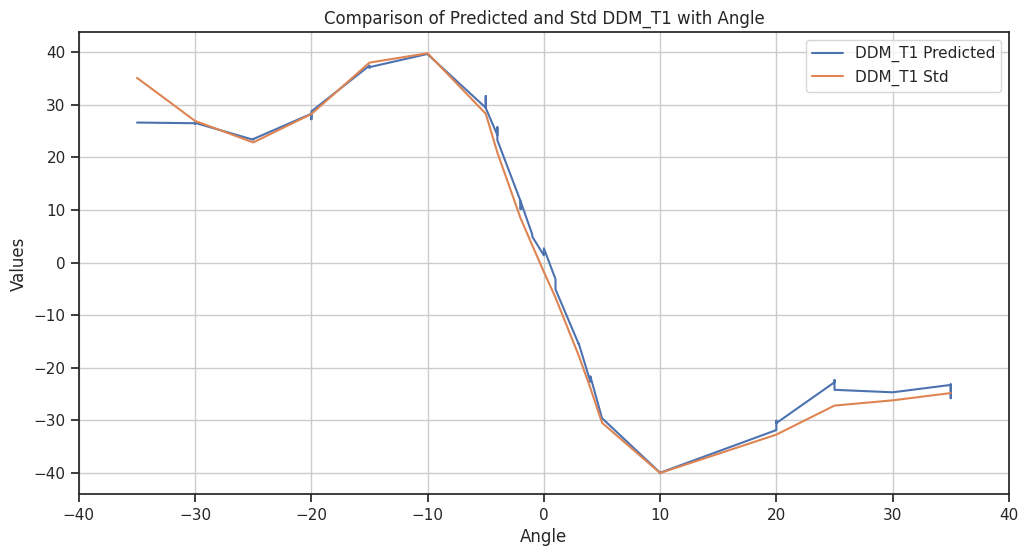

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted['ANGLE_y_ordered'], X_test_sorted['DDM_T1_predicted'], label='DDM_T1 Predicted')
plt.plot(X_test_sorted['ANGLE_y_ordered'], X_test_sorted['DDM_T1_std'], label='DDM_T1 Std')

plt.xlim(-40,40)
plt.grid(True)

plt.xlabel('Angle')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Std DDM_T1 with Angle')
plt.legend()
plt.show()